In [1]:
import os

In [2]:
os.chdir('../../..')

In [3]:
import convokit

In [4]:
corpus = convokit.Corpus(filename=convokit.download('reddit-corpus-small'))

Dataset already exists at /Users/calebchiam/.convokit/downloads/reddit-corpus-small


Let's get the fighting words for r/news and r/the_donald:

In [5]:
fw = convokit.FightingWords(l1_selector=lambda utt: utt.meta['subreddit'] == 'Christianity',
                           l2_selector=lambda utt: utt.meta['subreddit'] == "atheism")

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fw.threshold = 8

l1_func returned 2659 valid utterances. l2_func returned 2736 valid utterances.
Vocab size is 4967
Comparing language...
ngram zscores computed.


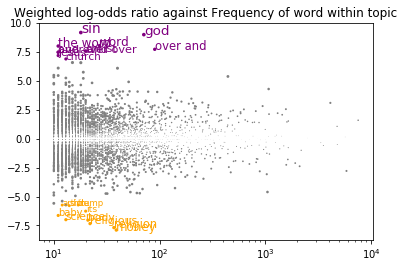

In [8]:
%matplotlib inline
# %matplotlib qt
fw.analyze(corpus)

In [9]:
ngram_zscores = fw.get_ngram_zscores()

In [10]:
# words used in L1
ngram_zscores[-10:]

[('church', 6.878968405224944),
 ('jesus', 7.176733807538942),
 ('over and over', 7.461183180850145),
 ('and over', 7.461183180850145),
 ('christ', 7.571934428874666),
 ('over and', 7.712752904895017),
 ('the word', 7.994271544152006),
 ('word', 8.030532975603759),
 ('god', 8.978852552638312),
 ('sin', 9.160217225471195)]

In [11]:
# words used in L2
ngram_zscores[:10]

[('money', -7.894504398268034),
 ('religion', -7.683359687279551),
 ('religious', -7.340896172397329),
 ('body', -7.043235776669458),
 ('science', -7.00135059049033),
 ('baby', -6.636715709624325),
 ('its', -6.2657875787104205),
 ('shit', -5.791006435023085),
 ('article', -5.738505860642729),
 ('trump', -5.73466544520334)]

In [12]:
# Words that are more typical of r/Christianity

In [13]:
fw.get_zscore("love")

5.312510805160985

In [14]:
fw.get_zscore("forgive")

1.9936615109801084

In [15]:
fw.get_zscore("repent")

3.0707598917964023

In [16]:
fw.get_zscore("marriage")

2.4678496443875355

In [17]:
# Words that are more typical of r/atheism

In [18]:
fw.get_zscore("government")

-4.24547265642047

In [19]:
fw.get_zscore("state")

-3.7256153360427717

In [20]:
fw.get_zscore("separation")

-1.9591827654633478

In [21]:
fw.annot_method

'top_k'

In [22]:
fw.transform(corpus)

In [23]:
list(fw.top_k_ngrams()[0])

['sin',
 'god',
 'word',
 'the word',
 'over and',
 'christ',
 'and over',
 'over and over',
 'jesus',
 'church']

In [24]:
for utt in corpus.iter_utterances():
    if utt.meta["subreddit"] in ["atheism", "Christianity"]:
        if len(utt.meta['fighting_words_l1']) > 0:
            print(utt.meta['subreddit'])
            print(utt.meta['fighting_words_l1'])
            print(utt.meta['fighting_words_l2'])
            print(utt.text)

Christianity
['sin', 'church']
['religion', 'religious']
Parents are strict, Orthodox and religious. Father is a priest. I was born in a country where the majority were Orthodox so I've grown up with faith. We moved to American a decade ago and it's been the same since.


But now, I feel so disillusioned. I feel so guilty about this but I simply don't believe in God like I used to. I despise going to church because of how strict it is. My whole family has to get up at 4am and attend church from 5am-10am. Not only that, but we have to stand 95% of the time. Every Sunday, I'm exhausted, bored out of my mind because it's in a language I don't understand and self conscious whenever I sit.


I don't know if it's just me losing faith or if I just *really* dislike my church environment. What I wouldn't give to go to a church in the afternoon or late morning with a 2 hour service where I could sit....but I can't even bring it up to my parents because they would 110% take it as a betrayal. I ca

atheism
['church']
['religion']
Ok, i didn't grow up in a "real" Christian family, so they never pushed me to going to church etc., so i realized pretty early that i don't believe in God. And that's it. I've always lived not caring about God and i was like "i don't like the idea of God, but don't care other people doing it". Until yesterday, when a guy told me "What if you're wrong and God does exist?". So i realized that, now i don't care about Christians (don't know enough about other religions to say anything about them), but if God was real and there were evidences, i would hate every persone who does pray to him, because they will be praying to a REAL dictator, who murder a lot of people and just lets bad thing happen. Is this way of thinking wrong?

Sorry for my bad English.
atheism
['god', 'church']
['religion', 'religious', 'science', 'its']
I feel we need a guide explaining the clash between science and religion. Religion often claims to be persecuted, and it's not true. So I 